#### 1 Data Loading

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load Data
df = pd.read_csv('Dataset.csv')
df.head()

,step,customer,age,gender,zipcodeOri,merchant,zipMerchant,category,amount,fraud
0,11,'C1760492708','1','F','28007','M1823072687','28007','es_transportation',52.35,0
1,172,'C1222389110','3','M','28007','M1823072687','28007','es_transportation',14.75,0
2,106,'C879949041','3','F','28007','M1823072687','28007','es_transportation',3.73,0
3,86,'C409740988','5','M','28007','M1823072687','28007','es_transportation',61.42,0
4,152,'C671449181','3','F','28007','M692898500','28007','es_health',9.05,0


In [2]:
sns.set(style='whitegrid')
pd.set_option('display.max_columns', None)

In [3]:
print(df.shape)
print(df.dtypes)
df.head()
df.tail()
df.sample(5)

(535178, 10)
step             int64
customer        object
age             object
gender          object
zipcodeOri      object
merchant        object
zipMerchant     object
category        object
amount         float64
fraud            int64
dtype: object


,step,customer,age,gender,zipcodeOri,merchant,zipMerchant,category,amount,fraud
232505,158,'C2136169439','5','M','28007','M1823072687','28007','es_transportation',38.69,0
308682,168,'C1973203074','4','F','28007','M1946091778','28007','es_wellnessandbeauty',26.07,0
133689,171,'C371570992','6','M','28007','M1823072687','28007','es_transportation',28.25,0
210122,6,'C229592862','4','F','28007','M348934600','28007','es_transportation',30.97,0
315499,25,'C2082605784','3','M','28007','M1823072687','28007','es_transportation',36.97,0


In [4]:
# Null check
df.isnull().sum()

# Data types summary
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 535178 entries, 0 to 535177
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   step         535178 non-null  int64  
 1   customer     535178 non-null  object 
 2   age          535178 non-null  object 
 3   gender       535178 non-null  object 
 4   zipcodeOri   535178 non-null  object 
 5   merchant     535178 non-null  object 
 6   zipMerchant  535178 non-null  object 
 7   category     535178 non-null  object 
 8   amount       535178 non-null  float64
 9   fraud        535178 non-null  int64  
dtypes: float64(1), int64(2), object(7)
memory usage: 40.8+ MB


In [5]:
!git remote -v

origin	https://github.com/Rmp2404/HSBC_Hackathon_2025.git (fetch)
origin	https://github.com/Rmp2404/HSBC_Hackathon_2025.git (push)


In [6]:
!git remote set-url origin https://github.com/Rmp2404/HSBC_Hackathon_2025.git

In [7]:
!git add .
!git commit -m "Null Values and Data Types"
!git push -u origin main

[main 72bc8a9] Null Values and Data Types
 3 files changed, 1226 insertions(+), 2842 deletions(-)
 delete mode 100644 .~DS_ML.ipynb
branch 'main' set up to track 'origin/main'.


To https://github.com/Rmp2404/HSBC_Hackathon_2025.git
   8aef477..72bc8a9  main -> main


fraud
0    98.786946
1     1.213054
Name: proportion, dtype: float64


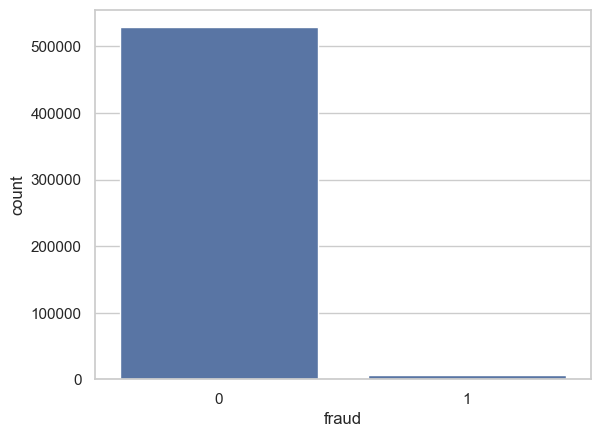

In [8]:
# Distribution of target
sns.countplot(data=df, x='fraud')
fraud_rate = df['fraud'].value_counts(normalize=True) * 100
print(fraud_rate)

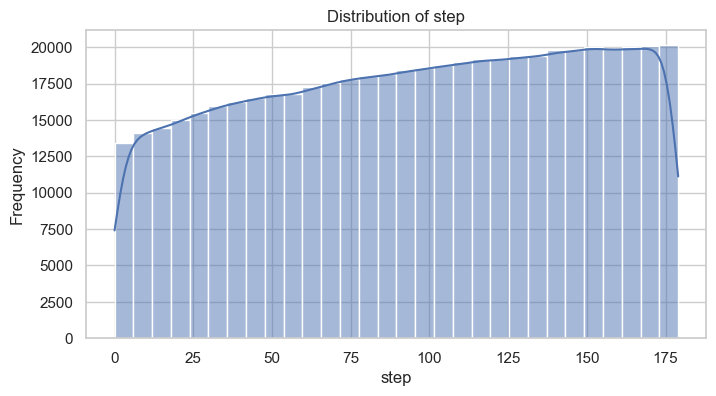

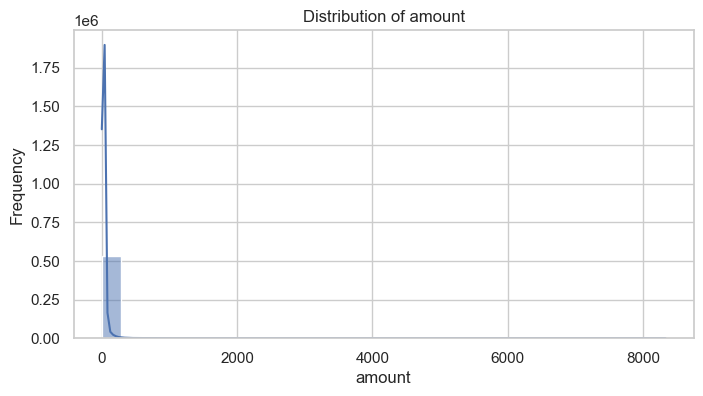

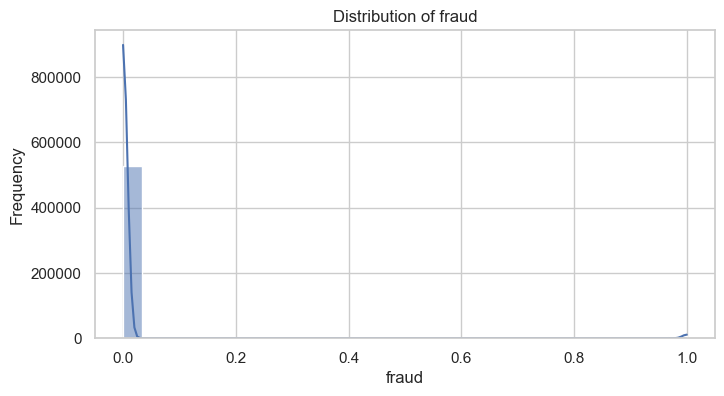

KeyboardInterrupt: 

In [38]:
def univariate_numerical(df):
    numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
    for col in numerical_cols:
        plt.figure(figsize=(8, 4))
        sns.histplot(df[col], kde=True, bins=30)
        plt.title(f'Distribution of {col}')
        plt.xlabel(col)
        plt.ylabel('Frequency')
        plt.grid(True)
        plt.show()
def univariate_categorical(df):
    categorical_cols = df.select_dtypes(include=['object', 'category']).columns
    for col in categorical_cols:
        plt.figure(figsize=(8, 4))
        sns.countplot(data=df, x=col, order=df[col].value_counts().index)
        plt.title(f'Count Plot of {col}')
        plt.xlabel(col)
        plt.ylabel('Count')
        plt.xticks(rotation=45)
        plt.grid(True)
        plt.show()
# assuming your DataFrame is called df
univariate_numerical(df)
univariate_categorical(df)



In [9]:
!git add .
!git commit -m "Target Distribution and Class Imbalance"
!git push

On branch main
Your branch is up to date with 'origin/main'.

nothing to commit, working tree clean


Everything up-to-date


In [10]:
# Unique value count
cat_cols = ['customer', 'gender', 'zipcodeOri', 'merchant', 'zipMerchant', 'category']
for col in cat_cols:
    print(f"{col}: {df[col].nunique()} unique values")

# Check a few example values
df[cat_cols].apply(lambda x: x.unique()[:5])

customer: 4112 unique values
gender: 4 unique values
zipcodeOri: 1 unique values
merchant: 50 unique values
zipMerchant: 1 unique values
category: 15 unique values


customer       ['C1760492708', 'C1222389110', 'C879949041', '...
gender                                      ['F', 'M', 'E', 'U']
zipcodeOri                                             ['28007']
merchant       ['M1823072687', 'M692898500', 'M348934600', 'M...
zipMerchant                                            ['28007']
category       ['es_transportation', 'es_health', 'es_fashion...
dtype: object

In [11]:
# Drop useless columns
df.drop(['zipcodeOri', 'zipMerchant'], axis=1, inplace=True)


In [12]:
df

,step,customer,age,gender,merchant,category,amount,fraud
0,11,'C1760492708','1','F','M1823072687','es_transportation',52.35,0
1,172,'C1222389110','3','M','M1823072687','es_transportation',14.75,0
2,106,'C879949041','3','F','M1823072687','es_transportation',3.73,0
3,86,'C409740988','5','M','M1823072687','es_transportation',61.42,0
4,152,'C671449181','3','F','M692898500','es_health',9.05,0
...,...,...,...,...,...,...,...,...
535173,40,'C1913044357','5','F','M348934600','es_transportation',38.12,0
535174,86,'C1341159565','2','F','M348934600','es_transportation',38.63,0
535175,117,'C1048588440','6','M','M1823072687','es_transportation',0.01,0
535176,47,'C1134333439','3','M','M348934600','es_transportation',20.37,0


In [13]:
df_copy=df.copy()

#### 3 Categorical to num conversion

In [24]:
feature_matrix_copy

,transaction_id,step,customer,age,gender,merchant,category,amount,customers.COUNT(transactions),customers.MAX(transactions.amount),customers.MAX(transactions.step),customers.MEAN(transactions.amount),customers.MEAN(transactions.step),customers.MIN(transactions.amount),customers.MIN(transactions.step),customers.MODE(transactions.age),customers.MODE(transactions.category),customers.MODE(transactions.gender),customers.MODE(transactions.merchant),customers.STD(transactions.amount),customers.STD(transactions.step),customers.SUM(transactions.amount),customers.SUM(transactions.step),merchants.COUNT(transactions),merchants.MAX(transactions.amount),merchants.MAX(transactions.step),merchants.MEAN(transactions.amount),merchants.MEAN(transactions.step),merchants.MIN(transactions.amount),merchants.MIN(transactions.step),merchants.MODE(transactions.age),merchants.MODE(transactions.category),merchants.MODE(transactions.customer),merchants.MODE(transactions.gender),merchants.STD(transactions.amount),merchants.STD(transactions.step),merchants.SUM(transactions.amount),merchants.SUM(transactions.step),fraud
0,0,11,'C1760492708','1','F','M1823072687','es_transportation',52.35,163,160.41,178.0,29.707914,90.269939,0.24,0.0,'1','es_transportation','F','M1823072687',24.835121,51.235364,4842.39,14714.0,269636,115.26,179.0,26.954451,107.562651,0.00,0.0,'2','es_transportation','C222098023','F',17.536763,47.302679,7267890.28,29002763.0,0
1,1,172,'C1222389110','3','M','M1823072687','es_transportation',14.75,159,194.83,179.0,29.407547,89.584906,0.17,0.0,'3','es_transportation','M','M1823072687',25.339354,53.253431,4675.80,14244.0,269636,115.26,179.0,26.954451,107.562651,0.00,0.0,'2','es_transportation','C222098023','F',17.536763,47.302679,7267890.28,29002763.0,0
2,2,106,'C879949041','3','F','M1823072687','es_transportation',3.73,145,135.92,178.0,29.027793,89.593103,0.34,2.0,'3','es_transportation','F','M1823072687',20.905876,52.472148,4209.03,12991.0,269636,115.26,179.0,26.954451,107.562651,0.00,0.0,'2','es_transportation','C222098023','F',17.536763,47.302679,7267890.28,29002763.0,0
3,3,86,'C409740988','5','M','M1823072687','es_transportation',61.42,154,189.11,179.0,31.522208,92.623377,0.53,0.0,'5','es_transportation','M','M1823072687',27.177598,50.845669,4854.42,14264.0,269636,115.26,179.0,26.954451,107.562651,0.00,0.0,'2','es_transportation','C222098023','F',17.536763,47.302679,7267890.28,29002763.0,0
4,4,152,'C671449181','3','F','M692898500','es_health',9.05,19,316.03,163.0,84.684737,102.631579,9.05,0.0,'3','es_health','F','M480139044',76.658094,53.958019,1609.01,1950.0,805,904.51,179.0,109.754211,77.915528,0.18,0.0,'2','es_health','C1001065306','F',96.326950,50.150126,88352.14,62722.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
535173,535173,40,'C1913044357','5','F','M348934600','es_transportation',38.12,152,84.43,179.0,28.777303,94.164474,0.17,5.0,'5','es_transportation','F','M1823072687',18.595297,50.039513,4374.15,14313.0,184938,118.07,179.0,26.946570,76.560545,0.00,0.0,'2','es_transportation','C1299474405','F',17.528205,50.704773,4983444.75,14158954.0,0
535174,535174,86,'C1341159565','2','F','M348934600','es_transportation',38.63,120,95.75,179.0,29.060917,107.675000,0.41,33.0,'2','es_transportation','F','M348934600',19.861861,42.055818,3487.31,12921.0,184938,118.07,179.0,26.946570,76.560545,0.00,0.0,'2','es_transportation','C1299474405','F',17.528205,50.704773,4983444.75,14158954.0,0
535175,535175,117,'C1048588440','6','M','M1823072687','es_transportation',0.01,155,248.11,179.0,27.127355,88.090323,0.01,0.0,'6','es_transportation','M','M1823072687',26.641359,52.186276,4204.74,13654.0,269636,115.26,179.0,26.954451,107.562651,0.00,0.0,'2','es_transportation','C222098023','F',17.536763,47.302679,7267890.28,29002763.0,0
535176,535176,47,'C1134333439','3','M','M348934600','es_transportation',20.37,124,309.61,179.0,40.355242,107.032258,0.0

In [25]:
feature_matrix_copy['age'] = feature_matrix_copy['age'].str.strip("'")  # Remove surrounding quotes

# Replace 'U' with a placeholder value (like -1 or the mode)
feature_matrix_copy['age'] = feature_matrix_copy['age'].replace('U', -1)

# Now convert to int
feature_matrix_copy['age'] = feature_matrix_copy['age'].astype(int)


In [26]:
feature_matrix_copy['age'] = feature_matrix_copy['age'].astype(str).str.extract('(\d+)').astype(int)


<>:1: SyntaxWarning: invalid escape sequence '\d'
<>:1: SyntaxWarning: invalid escape sequence '\d'
C:\Users\R Madhapreetha\AppData\Local\Temp\ipykernel_10920\3559287429.py:1: SyntaxWarning: invalid escape sequence '\d'
  feature_matrix_copy['age'] = feature_matrix_copy['age'].astype(str).str.extract('(\d+)').astype(int)


In [27]:
# Convert all except gender/category (which may still be categorical)
for col in feature_matrix_copy.columns:
    if col not in ['gender', 'category','customer','merchant']:
        feature_matrix_copy[col] = pd.to_numeric(feature_matrix_copy[col], errors='coerce')


In [28]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Copy of feature_matrix
df_try = feature_matrix_copy.copy()

# 1. Strip quotes if necessary (you have values like 'F')
for col in df_try.select_dtypes(include='object').columns:
    df_try[col] = df_try[col].str.strip("'").fillna("missing")

# 2. Encode categorical features using LabelEncoder
label_encoders = {}
for col in ['gender', 'category', 'customer', 'merchant']:
    le = LabelEncoder()
    df_try[col] = le.fit_transform(df_try[col])
    label_encoders[col] = le

# 3. Now safely convert everything else to numeric
for col in df_try.columns:
    if col not in ['gender', 'category', 'customer', 'merchant']:
        df_try[col] = pd.to_numeric(df_try[col], errors='coerce')

# 4. Optionally fill remaining NaNs (from numeric columns)
df_try.fillna(0, inplace=True)

# Now df is fully numeric and ready for train/test/SMOTE/model


In [29]:
df_try

,transaction_id,step,customer,age,gender,merchant,category,amount,customers.COUNT(transactions),customers.MAX(transactions.amount),customers.MAX(transactions.step),customers.MEAN(transactions.amount),customers.MEAN(transactions.step),customers.MIN(transactions.amount),customers.MIN(transactions.step),customers.MODE(transactions.age),customers.MODE(transactions.category),customers.MODE(transactions.gender),customers.MODE(transactions.merchant),customers.STD(transactions.amount),customers.STD(transactions.step),customers.SUM(transactions.amount),customers.SUM(transactions.step),merchants.COUNT(transactions),merchants.MAX(transactions.amount),merchants.MAX(transactions.step),merchants.MEAN(transactions.amount),merchants.MEAN(transactions.step),merchants.MIN(transactions.amount),merchants.MIN(transactions.step),merchants.MODE(transactions.age),merchants.MODE(transactions.category),merchants.MODE(transactions.customer),merchants.MODE(transactions.gender),merchants.STD(transactions.amount),merchants.STD(transactions.step),merchants.SUM(transactions.amount),merchants.SUM(transactions.step),fraud
0,0,11,1648,1,1,18,12,52.35,163,160.41,178.0,29.707914,90.269939,0.24,0.0,0.0,0.0,0.0,0.0,24.835121,51.235364,4842.39,14714.0,269636,115.26,179.0,26.954451,107.562651,0.00,0.0,0.0,0.0,0.0,0.0,17.536763,47.302679,7267890.28,29002763.0,0
1,1,172,496,3,2,18,12,14.75,159,194.83,179.0,29.407547,89.584906,0.17,0.0,0.0,0.0,0.0,0.0,25.339354,53.253431,4675.80,14244.0,269636,115.26,179.0,26.954451,107.562651,0.00,0.0,0.0,0.0,0.0,0.0,17.536763,47.302679,7267890.28,29002763.0,0
2,2,106,3858,3,1,18,12,3.73,145,135.92,178.0,29.027793,89.593103,0.34,2.0,0.0,0.0,0.0,0.0,20.905876,52.472148,4209.03,12991.0,269636,115.26,179.0,26.954451,107.562651,0.00,0.0,0.0,0.0,0.0,0.0,17.536763,47.302679,7267890.28,29002763.0,0
3,3,86,2879,5,2,18,12,61.42,154,189.11,179.0,31.522208,92.623377,0.53,0.0,0.0,0.0,0.0,0.0,27.177598,50.845669,4854.42,14264.0,269636,115.26,179.0,26.954451,107.562651,0.00,0.0,0.0,0.0,0.0,0.0,17.536763,47.302679,7267890.28,29002763.0,0
4,4,152,3412,3,1,39,4,9.05,19,316.03,163.0,84.684737,102.631579,9.05,0.0,0.0,0.0,0.0,0.0,76.658094,53.958019,1609.01,1950.0,805,904.51,179.0,109.754211,77.915528,0.18,0.0,0.0,0.0,0.0,0.0,96.326950,50.150126,88352.14,62722.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
535173,535173,40,1981,5,1,30,12,38.12,152,84.43,179.0,28.777303,94.164474,0.17,5.0,0.0,0.0,0.0,0.0,18.595297,50.039513,4374.15,14313.0,184938,118.07,179.0,26.946570,76.560545,0.00,0.0,0.0,0.0,0.0,0.0,17.528205,50.704773,4983444.75,14158954.0,0
535174,535174,86,747,2,1,30,12,38.63,120,95.75,179.0,29.060917,107.675000,0.41,33.0,0.0,0.0,0.0,0.0,19.861861,42.055818,3487.31,12921.0,184938,118.07,179.0,26.946570,76.560545,0.00,0.0,0.0,0.0,0.0,0.0,17.528205,50.704773,4983444.75,14158954.0,0
535175,535175,117,104,6,2,18,12,0.01,155,248.11,179.0,27.127355,88.090323,0.01,0.0,0.0,0.0,0.0,0.0,26.641359,52.186276,4204.74,13654.0,269636,115.26,179.0,26.954451,107.562651,0.00,0.0,0.0,0.0,0.0,0.0,17.536763,47.302679,7267890.28,29002763.0,0
535176,535176,47,291,3,2,30,12,20.37,124,309.61,179.0,40.355242,107.032258,0.02,10.0,0.0,0.0,0.0,0.0,52.347126,44.899877,5004.05,13272.0,184938,118.07,179.0,26.946570,76.560545,0.00,0.0,0.0,0.0,0.0,0.0,17.528205,50.704773,4983444.75,14158954.0,0


In [30]:
print(df_try.dtypes)
print(df_try.head())

transaction_id                             int64
step                                       int64
customer                                   int64
age                                        int64
gender                                     int64
merchant                                   int64
category                                   int64
amount                                   float64
customers.COUNT(transactions)              Int64
customers.MAX(transactions.amount)       float64
customers.MAX(transactions.step)         float64
customers.MEAN(transactions.amount)      float64
customers.MEAN(transactions.step)        float64
customers.MIN(transactions.amount)       float64
customers.MIN(transactions.step)         float64
customers.MODE(transactions.age)         float64
customers.MODE(transactions.category)    float64
customers.MODE(transactions.gender)      float64
customers.MODE(transactions.merchant)    float64
customers.STD(transactions.amount)       float64
customers.STD(transa

In [70]:
from sklearn.preprocessing import LabelEncoder

# Copy the dataframe to avoid changing the original
df_encoded = df_try.copy()

# List of categorical columns to encode
#categorical_cols = ['gender', 'category']

# Apply Label Encoding
#le = LabelEncoder()
#for col in categorical_cols:
#    df_encoded[col] = le.fit_transform(df_encoded[col])


In [71]:
df_encoded

,transaction_id,step,customer,age,gender,merchant,category,amount,customers.COUNT(transactions),customers.MAX(transactions.amount),customers.MAX(transactions.step),customers.MEAN(transactions.amount),customers.MEAN(transactions.step),customers.MIN(transactions.amount),customers.MIN(transactions.step),customers.MODE(transactions.age),customers.MODE(transactions.category),customers.MODE(transactions.gender),customers.MODE(transactions.merchant),customers.STD(transactions.amount),customers.STD(transactions.step),customers.SUM(transactions.amount),customers.SUM(transactions.step),merchants.COUNT(transactions),merchants.MAX(transactions.amount),merchants.MAX(transactions.step),merchants.MEAN(transactions.amount),merchants.MEAN(transactions.step),merchants.MIN(transactions.amount),merchants.MIN(transactions.step),merchants.MODE(transactions.age),merchants.MODE(transactions.category),merchants.MODE(transactions.customer),merchants.MODE(transactions.gender),merchants.STD(transactions.amount),merchants.STD(transactions.step),merchants.SUM(transactions.amount),merchants.SUM(transactions.step),fraud
0,0,11,1648,1,1,18,12,52.35,163,160.41,178.0,29.707914,90.269939,0.24,0.0,0.0,0.0,0.0,0.0,24.835121,51.235364,4842.39,14714.0,269636,115.26,179.0,26.954451,107.562651,0.00,0.0,0.0,0.0,0.0,0.0,17.536763,47.302679,7267890.28,29002763.0,0
1,1,172,496,3,2,18,12,14.75,159,194.83,179.0,29.407547,89.584906,0.17,0.0,0.0,0.0,0.0,0.0,25.339354,53.253431,4675.80,14244.0,269636,115.26,179.0,26.954451,107.562651,0.00,0.0,0.0,0.0,0.0,0.0,17.536763,47.302679,7267890.28,29002763.0,0
2,2,106,3858,3,1,18,12,3.73,145,135.92,178.0,29.027793,89.593103,0.34,2.0,0.0,0.0,0.0,0.0,20.905876,52.472148,4209.03,12991.0,269636,115.26,179.0,26.954451,107.562651,0.00,0.0,0.0,0.0,0.0,0.0,17.536763,47.302679,7267890.28,29002763.0,0
3,3,86,2879,5,2,18,12,61.42,154,189.11,179.0,31.522208,92.623377,0.53,0.0,0.0,0.0,0.0,0.0,27.177598,50.845669,4854.42,14264.0,269636,115.26,179.0,26.954451,107.562651,0.00,0.0,0.0,0.0,0.0,0.0,17.536763,47.302679,7267890.28,29002763.0,0
4,4,152,3412,3,1,39,4,9.05,19,316.03,163.0,84.684737,102.631579,9.05,0.0,0.0,0.0,0.0,0.0,76.658094,53.958019,1609.01,1950.0,805,904.51,179.0,109.754211,77.915528,0.18,0.0,0.0,0.0,0.0,0.0,96.326950,50.150126,88352.14,62722.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
535173,535173,40,1981,5,1,30,12,38.12,152,84.43,179.0,28.777303,94.164474,0.17,5.0,0.0,0.0,0.0,0.0,18.595297,50.039513,4374.15,14313.0,184938,118.07,179.0,26.946570,76.560545,0.00,0.0,0.0,0.0,0.0,0.0,17.528205,50.704773,4983444.75,14158954.0,0
535174,535174,86,747,2,1,30,12,38.63,120,95.75,179.0,29.060917,107.675000,0.41,33.0,0.0,0.0,0.0,0.0,19.861861,42.055818,3487.31,12921.0,184938,118.07,179.0,26.946570,76.560545,0.00,0.0,0.0,0.0,0.0,0.0,17.528205,50.704773,4983444.75,14158954.0,0
535175,535175,117,104,6,2,18,12,0.01,155,248.11,179.0,27.127355,88.090323,0.01,0.0,0.0,0.0,0.0,0.0,26.641359,52.186276,4204.74,13654.0,269636,115.26,179.0,26.954451,107.562651,0.00,0.0,0.0,0.0,0.0,0.0,17.536763,47.302679,7267890.28,29002763.0,0
535176,535176,47,291,3,2,30,12,20.37,124,309.61,179.0,40.355242,107.032258,0.02,10.0,0.0,0.0,0.0,0.0,52.347126,44.899877,5004.05,13272.0,184938,118.07,179.0,26.946570,76.560545,0.00,0.0,0.0,0.0,0.0,0.0,17.528205,50.704773,4983444.75,14158954.0,0


In [36]:
print(df_encoded.dtypes)
print(df_encoded.head())

transaction_id                             int64
step                                       int64
customer                                   int64
age                                        int64
gender                                     int64
merchant                                   int64
category                                   int64
amount                                   float64
customers.COUNT(transactions)              Int64
customers.MAX(transactions.amount)       float64
customers.MAX(transactions.step)         float64
customers.MEAN(transactions.amount)      float64
customers.MEAN(transactions.step)        float64
customers.MIN(transactions.amount)       float64
customers.MIN(transactions.step)         float64
customers.MODE(transactions.age)         float64
customers.MODE(transactions.category)    float64
customers.MODE(transactions.gender)      float64
customers.MODE(transactions.merchant)    float64
customers.STD(transactions.amount)       float64
customers.STD(transa

In [ ]:
!git add .
!git commit -m "Categorical to numeric conversion"
!git push -u origin main

#### 2 Feature Engineering


In [14]:
df_copy['transaction_id'] = df_copy.index

In [15]:
import featuretools as ft

# Create an empty EntitySet
es = ft.EntitySet(id="fraud_data")

# Add the base dataframe
es = es.add_dataframe(
    dataframe_name="transactions",
    dataframe=df_copy.drop(columns=['fraud']),  # Drop target to prevent leakage
    index="transaction_id",                # You must have a unique ID column            
)


C:\Users\R Madhapreetha\AppData\Local\Programs\Python\Python313\Lib\site-packages\woodwork\type_sys\utils.py:33: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  pd.to_datetime(
C:\Users\R Madhapreetha\AppData\Local\Programs\Python\Python313\Lib\site-packages\woodwork\type_sys\utils.py:33: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  pd.to_datetime(
C:\Users\R Madhapreetha\AppData\Local\Programs\Python\Python313\Lib\site-packages\woodwork\type_sys\utils.py:33: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  pd.to_datetime(
C:\Users\R Madhapreetha\AppData\Local\Programs\Python\P

In [16]:
# Normalize customer entity
es = es.normalize_dataframe(
    base_dataframe_name="transactions",
    new_dataframe_name="customers",
    index="customer"
)

# Normalize merchant entity
es = es.normalize_dataframe(
    base_dataframe_name="transactions",
    new_dataframe_name="merchants",
    index="merchant"
)


In [17]:
feature_matrix, feature_defs = ft.dfs(
    entityset=es,
    target_dataframe_name="transactions",
    agg_primitives=["mean", "sum", "count", "mode", "std", "max", "min"],
    trans_primitives=["month", "weekday", "hour", "day"],
    max_depth=2,
    verbose=True
)

C:\Users\R Madhapreetha\AppData\Local\Programs\Python\Python313\Lib\site-packages\featuretools\synthesis\dfs.py:321: UnusedPrimitiveWarning: Some specified primitives were not used during DFS:
  trans_primitives: ['day', 'hour', 'month', 'weekday']
This may be caused by a using a value of max_depth that is too small, not setting interesting values, or it may indicate no compatible columns for the primitive were found in the data. If the DFS call contained multiple instances of a primitive in the list above, none of them were used.
  warnings.warn(warning_msg, UnusedPrimitiveWarning)


Built 37 features
Elapsed: 00:00 | Progress:   0%|                                                                                       

C:\Users\R Madhapreetha\AppData\Local\Programs\Python\Python313\Lib\site-packages\featuretools\computational_backends\feature_set_calculator.py:785: FutureWarning: The provided callable <function min at 0x0000013841B91C60> is currently using SeriesGroupBy.min. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "min" instead.
  ).agg(to_agg)
C:\Users\R Madhapreetha\AppData\Local\Programs\Python\Python313\Lib\site-packages\featuretools\computational_backends\feature_set_calculator.py:785: FutureWarning: The provided callable <function std at 0x0000013841B92660> is currently using SeriesGroupBy.std. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "std" instead.
  ).agg(to_agg)
C:\Users\R Madhapreetha\AppData\Local\Programs\Python\Python313\Lib\site-packages\featuretools\computational_backends\feature_set_calculator.py:785: FutureWarning: The provided calla

Elapsed: 00:03 | Progress:  26%|██████████████████████▍                                                                

C:\Users\R Madhapreetha\AppData\Local\Programs\Python\Python313\Lib\site-packages\featuretools\computational_backends\feature_set_calculator.py:785: FutureWarning: The provided callable <function min at 0x0000013841B91C60> is currently using SeriesGroupBy.min. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "min" instead.
  ).agg(to_agg)
C:\Users\R Madhapreetha\AppData\Local\Programs\Python\Python313\Lib\site-packages\featuretools\computational_backends\feature_set_calculator.py:785: FutureWarning: The provided callable <function sum at 0x0000013841B91120> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  ).agg(to_agg)
C:\Users\R Madhapreetha\AppData\Local\Programs\Python\Python313\Lib\site-packages\featuretools\computational_backends\feature_set_calculator.py:785: FutureWarning: The provided calla

Elapsed: 00:13 | Progress: 100%|███████████████████████████████████████████████████████████████████████████████████████


In [18]:
print(feature_matrix.head())

                step       customer  age gender       merchant  \
transaction_id                                                   
0                 11  'C1760492708'  '1'    'F'  'M1823072687'   
1                172  'C1222389110'  '3'    'M'  'M1823072687'   
2                106   'C879949041'  '3'    'F'  'M1823072687'   
3                 86   'C409740988'  '5'    'M'  'M1823072687'   
4                152   'C671449181'  '3'    'F'   'M692898500'   

                           category  amount  customers.COUNT(transactions)  \
transaction_id                                                               
0               'es_transportation'   52.35                            163   
1               'es_transportation'   14.75                            159   
2               'es_transportation'    3.73                            145   
3               'es_transportation'   61.42                            154   
4                       'es_health'    9.05                          

In [19]:
feature_matrix.head(20).style.set_sticky()

,step,customer,age,gender,merchant,category,amount,customers.COUNT(transactions),customers.MAX(transactions.amount),customers.MAX(transactions.step),customers.MEAN(transactions.amount),customers.MEAN(transactions.step),customers.MIN(transactions.amount),customers.MIN(transactions.step),customers.MODE(transactions.age),customers.MODE(transactions.category),customers.MODE(transactions.gender),customers.MODE(transactions.merchant),customers.STD(transactions.amount),customers.STD(transactions.step),customers.SUM(transactions.amount),customers.SUM(transactions.step),merchants.COUNT(transactions),merchants.MAX(transactions.amount),merchants.MAX(transactions.step),merchants.MEAN(transactions.amount),merchants.MEAN(transactions.step),merchants.MIN(transactions.amount),merchants.MIN(transactions.step),merchants.MODE(transactions.age),merchants.MODE(transactions.category),merchants.MODE(transactions.customer),merchants.MODE(transactions.gender),merchants.STD(transactions.amount),merchants.STD(transactions.step),merchants.SUM(transactions.amount),merchants.SUM(transactions.step)
transaction_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,11,'C1760492708','1','F','M1823072687','es_transportation',52.350000,163,160.410000,178.000000,29.707914,90.269939,0.240000,0.000000,'1','es_transportation','F','M1823072687',24.835121,51.235364,4842.390000,14714.000000,269636,115.260000,179.000000,26.954451,107.562651,0.000000,0.000000,'2','es_transportation','C222098023','F',17.536763,47.302679,7267890.280000,29002763.000000
1,172,'C1222389110','3','M','M1823072687','es_transportation',14.750000,159,194.830000,179.000000,29.407547,89.584906,0.170000,0.000000,'3','es_transportation','M','M1823072687',25.339354,53.253431,4675.800000,14244.000000,269636,115.260000,179.000000,26.954451,107.562651,0.000000,0.000000,'2','es_transportation','C222098023','F',17.536763,47.302679,7267890.280000,29002763.000000
2,106,'C879949041','3','F','M1823072687','es_transportation',3.730000,145,135.920000,178.000000,29.027793,89.593103,0.340000,2.000000,'3','es_transportation','F','M1823072687',20.905876,52.472148,4209.030000,12991.000000,269636,115.260000,179.000000,26.954451,107.562651,0.000000,0.000000,'2','es_transportation','C222098023','F',17.536763,47.302679,7267890.280000,29002763.000000
3,86,'C409740988','5','M','M1823072687','es_transportation',61.420000,154,189.110000,179.000000,31.522208,92.623377,0.530000,0.000000,'5','es_transportation','M','M1823072687',27.177598,50.845669,4854.420000,14264.000000,269636,115.260000,179.000000,26.954451,107.562651,0.000000,0.000000,'2','es_transportation','C222098023','F',17.536763,47.302679,7267890.280000,29002763.000000
4,152,'C671449181','3','F','M692898500','es_health',9.050000,19,316.030000,163.000000,84.684737,102.631579,9.050000,0.000000,'3','es_health','F','M480139044',76.658094,53.958019,1609.010000,1950.000000,805,904.510000,179.000000,109.754211,77.915528,0.180000,0.000000,'2','es_health','C1001065306','F',96.326950,50.150126,88352.140000,62722.000000
5,161,'C117112395','3','F','M1823072687','es_transportation',26.440000,163,270.960000,179.000000,33.290184,92.472393,0.040000,0.000000,'3','es_transportation','F','M1823072687',35.308278,52.761789,5426.300000,15073.000000,269636,115.260000,179.000000,26.954451,107.562651,0.000000,0.000000,'2','es_transportation','C222098023','F',17.536763,47.302679,7267890.280000,29002763.000000
6,145,'C1449000407','2','M','M1823072687','es_transportation',21.620000,158,82.940000,179.000000,28.112152,91.670886,0.880000,0.000000,'2','es_transportation','M','M1823072687',18.736177,52.516475,4441.720000,14484.000000,269636,115.260000,179.000000,26.954451,107.562651,0.000000,0.000000,'2','es_transportation','C222098023','F',17.536763,47.302679,7267890.280000,29002763.000000
7,141,'C1266329800','4','F','M1823072687','es_transportation',18.390000,148,166.750000,179.000000,30.021622,92.385135,0.570000,0.000000,'4','es_transportation','F','M348934600',22.516502,52.529943,4443.200000,13673.000000,269

In [20]:
feature_matrix = feature_matrix.reset_index()  # To bring transaction_id into a column
df['transaction_id'] = df.index                # If not already there

# Merge back the target
feature_matrix = feature_matrix.merge(df[['transaction_id', 'fraud']], on='transaction_id', how='left')

In [21]:
!git add .
!git commit -m "Feature Engineering"
!git push

[main 1570bc7] Feature Engineering
 1 file changed, 93 insertions(+), 74 deletions(-)


To https://github.com/Rmp2404/HSBC_Hackathon_2025.git
   72bc8a9..1570bc7  main -> main


In [22]:
feature_matrix_copy=feature_matrix.copy()

In [23]:
feature_matrix_copy.head()

,transaction_id,step,customer,age,gender,merchant,category,amount,customers.COUNT(transactions),customers.MAX(transactions.amount),customers.MAX(transactions.step),customers.MEAN(transactions.amount),customers.MEAN(transactions.step),customers.MIN(transactions.amount),customers.MIN(transactions.step),customers.MODE(transactions.age),customers.MODE(transactions.category),customers.MODE(transactions.gender),customers.MODE(transactions.merchant),customers.STD(transactions.amount),customers.STD(transactions.step),customers.SUM(transactions.amount),customers.SUM(transactions.step),merchants.COUNT(transactions),merchants.MAX(transactions.amount),merchants.MAX(transactions.step),merchants.MEAN(transactions.amount),merchants.MEAN(transactions.step),merchants.MIN(transactions.amount),merchants.MIN(transactions.step),merchants.MODE(transactions.age),merchants.MODE(transactions.category),merchants.MODE(transactions.customer),merchants.MODE(transactions.gender),merchants.STD(transactions.amount),merchants.STD(transactions.step),merchants.SUM(transactions.amount),merchants.SUM(transactions.step),fraud
0,0,11,'C1760492708','1','F','M1823072687','es_transportation',52.35,163,160.41,178.0,29.707914,90.269939,0.24,0.0,'1','es_transportation','F','M1823072687',24.835121,51.235364,4842.39,14714.0,269636,115.26,179.0,26.954451,107.562651,0.00,0.0,'2','es_transportation','C222098023','F',17.536763,47.302679,7267890.28,29002763.0,0
1,1,172,'C1222389110','3','M','M1823072687','es_transportation',14.75,159,194.83,179.0,29.407547,89.584906,0.17,0.0,'3','es_transportation','M','M1823072687',25.339354,53.253431,4675.80,14244.0,269636,115.26,179.0,26.954451,107.562651,0.00,0.0,'2','es_transportation','C222098023','F',17.536763,47.302679,7267890.28,29002763.0,0
2,2,106,'C879949041','3','F','M1823072687','es_transportation',3.73,145,135.92,178.0,29.027793,89.593103,0.34,2.0,'3','es_transportation','F','M1823072687',20.905876,52.472148,4209.03,12991.0,269636,115.26,179.0,26.954451,107.562651,0.00,0.0,'2','es_transportation','C222098023','F',17.536763,47.302679,7267890.28,29002763.0,0
3,3,86,'C409740988','5','M','M1823072687','es_transportation',61.42,154,189.11,179.0,31.522208,92.623377,0.53,0.0,'5','es_transportation','M','M1823072687',27.177598,50.845669,4854.42,14264.0,269636,115.26,179.0,26.954451,107.562651,0.00,0.0,'2','es_transportation','C222098023','F',17.536763,47.302679,7267890.28,29002763.0,0
4,4,152,'C671449181','3','F','M692898500','es_health',9.05,19,316.03,163.0,84.684737,102.631579,9.05,0.0,'3','es_health','F','M480139044',76.658094,53.958019,1609.01,1950.0,805,904.51,179.0,109.754211,77.915528,0.18,0.0,'2','es_health','C1001065306','F',96.326950,50.150126,88352.14,62722.0,0


In [ ]:
!git add .
!git commit -m "Feature Engineering and aggrigation"
!git push -u origin main

In [43]:
df_encoded

,transaction_id,step,customer,age,gender,merchant,category,amount,customers.COUNT(transactions),customers.MAX(transactions.amount),customers.MAX(transactions.step),customers.MEAN(transactions.amount),customers.MEAN(transactions.step),customers.MIN(transactions.amount),customers.MIN(transactions.step),customers.MODE(transactions.age),customers.MODE(transactions.category),customers.MODE(transactions.gender),customers.MODE(transactions.merchant),customers.STD(transactions.amount),customers.STD(transactions.step),customers.SUM(transactions.amount),customers.SUM(transactions.step),merchants.COUNT(transactions),merchants.MAX(transactions.amount),merchants.MAX(transactions.step),merchants.MEAN(transactions.amount),merchants.MEAN(transactions.step),merchants.MIN(transactions.amount),merchants.MIN(transactions.step),merchants.MODE(transactions.age),merchants.MODE(transactions.category),merchants.MODE(transactions.customer),merchants.MODE(transactions.gender),merchants.STD(transactions.amount),merchants.STD(transactions.step),merchants.SUM(transactions.amount),merchants.SUM(transactions.step),fraud
0,0,11,1648,1,1,18,12,52.35,163,160.41,178.0,29.71,90.27,0.24,0.0,0.0,0.0,0.0,0.0,24.84,51.24,4842.39,14714.0,269636,115.26,179.0,26.95,107.56,0.00,0.0,0.0,0.0,0.0,0.0,17.54,47.30,7267890.28,29002763.0,0
1,1,172,496,3,2,18,12,14.75,159,194.83,179.0,29.41,89.58,0.17,0.0,0.0,0.0,0.0,0.0,25.34,53.25,4675.80,14244.0,269636,115.26,179.0,26.95,107.56,0.00,0.0,0.0,0.0,0.0,0.0,17.54,47.30,7267890.28,29002763.0,0
2,2,106,3858,3,1,18,12,3.73,145,135.92,178.0,29.03,89.59,0.34,2.0,0.0,0.0,0.0,0.0,20.91,52.47,4209.03,12991.0,269636,115.26,179.0,26.95,107.56,0.00,0.0,0.0,0.0,0.0,0.0,17.54,47.30,7267890.28,29002763.0,0
3,3,86,2879,5,2,18,12,61.42,154,189.11,179.0,31.52,92.62,0.53,0.0,0.0,0.0,0.0,0.0,27.18,50.85,4854.42,14264.0,269636,115.26,179.0,26.95,107.56,0.00,0.0,0.0,0.0,0.0,0.0,17.54,47.30,7267890.28,29002763.0,0
4,4,152,3412,3,1,39,4,9.05,19,316.03,163.0,84.68,102.63,9.05,0.0,0.0,0.0,0.0,0.0,76.66,53.96,1609.01,1950.0,805,904.51,179.0,109.75,77.92,0.18,0.0,0.0,0.0,0.0,0.0,96.33,50.15,88352.14,62722.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
535173,535173,40,1981,5,1,30,12,38.12,152,84.43,179.0,28.78,94.16,0.17,5.0,0.0,0.0,0.0,0.0,18.60,50.04,4374.15,14313.0,184938,118.07,179.0,26.95,76.56,0.00,0.0,0.0,0.0,0.0,0.0,17.53,50.70,4983444.75,14158954.0,0
535174,535174,86,747,2,1,30,12,38.63,120,95.75,179.0,29.06,107.68,0.41,33.0,0.0,0.0,0.0,0.0,19.86,42.06,3487.31,12921.0,184938,118.07,179.0,26.95,76.56,0.00,0.0,0.0,0.0,0.0,0.0,17.53,50.70,4983444.75,14158954.0,0
535175,535175,117,104,6,2,18,12,0.01,155,248.11,179.0,27.13,88.09,0.01,0.0,0.0,0.0,0.0,0.0,26.64,52.19,4204.74,13654.0,269636,115.26,179.0,26.95,107.56,0.00,0.0,0.0,0.0,0.0,0.0,17.54,47.30,7267890.28,29002763.0,0
535176,535176,47,291,3,2,30,12,20.37,124,309.61,179.0,40.36,107.03,0.02,10.0,0.0,0.0,0.0,0.0,52.35,44.90,5004.05,13272.0,184938,118.07,179.0,26.95,76.56,0.00,0.0,0.0,0.0,0.0,0.0,17.53,50.70,4983444.75,14158954.0,0


In [42]:
df_encoded = df_encoded.round(2)

In [69]:
df_encoded

,feature1,feature2,feature3,transaction_id,fraud
0,0.313650,0.573616,0.083987,0,0
1,0.239515,0.434929,0.395208,1,0
2,0.573926,0.780337,0.387180,2,0
3,0.590165,0.903338,0.799637,3,0
4,0.832038,0.529527,0.441432,4,0
...,...,...,...,...,...
3995,0.133039,0.501342,0.966715,3995,1
3996,0.557187,0.314893,0.034750,3996,1
3997,0.915499,0.301566,0.281871,3997,1
3998,0.098813,0.287645,0.701136,3998,1


#### 4 Train-Test split

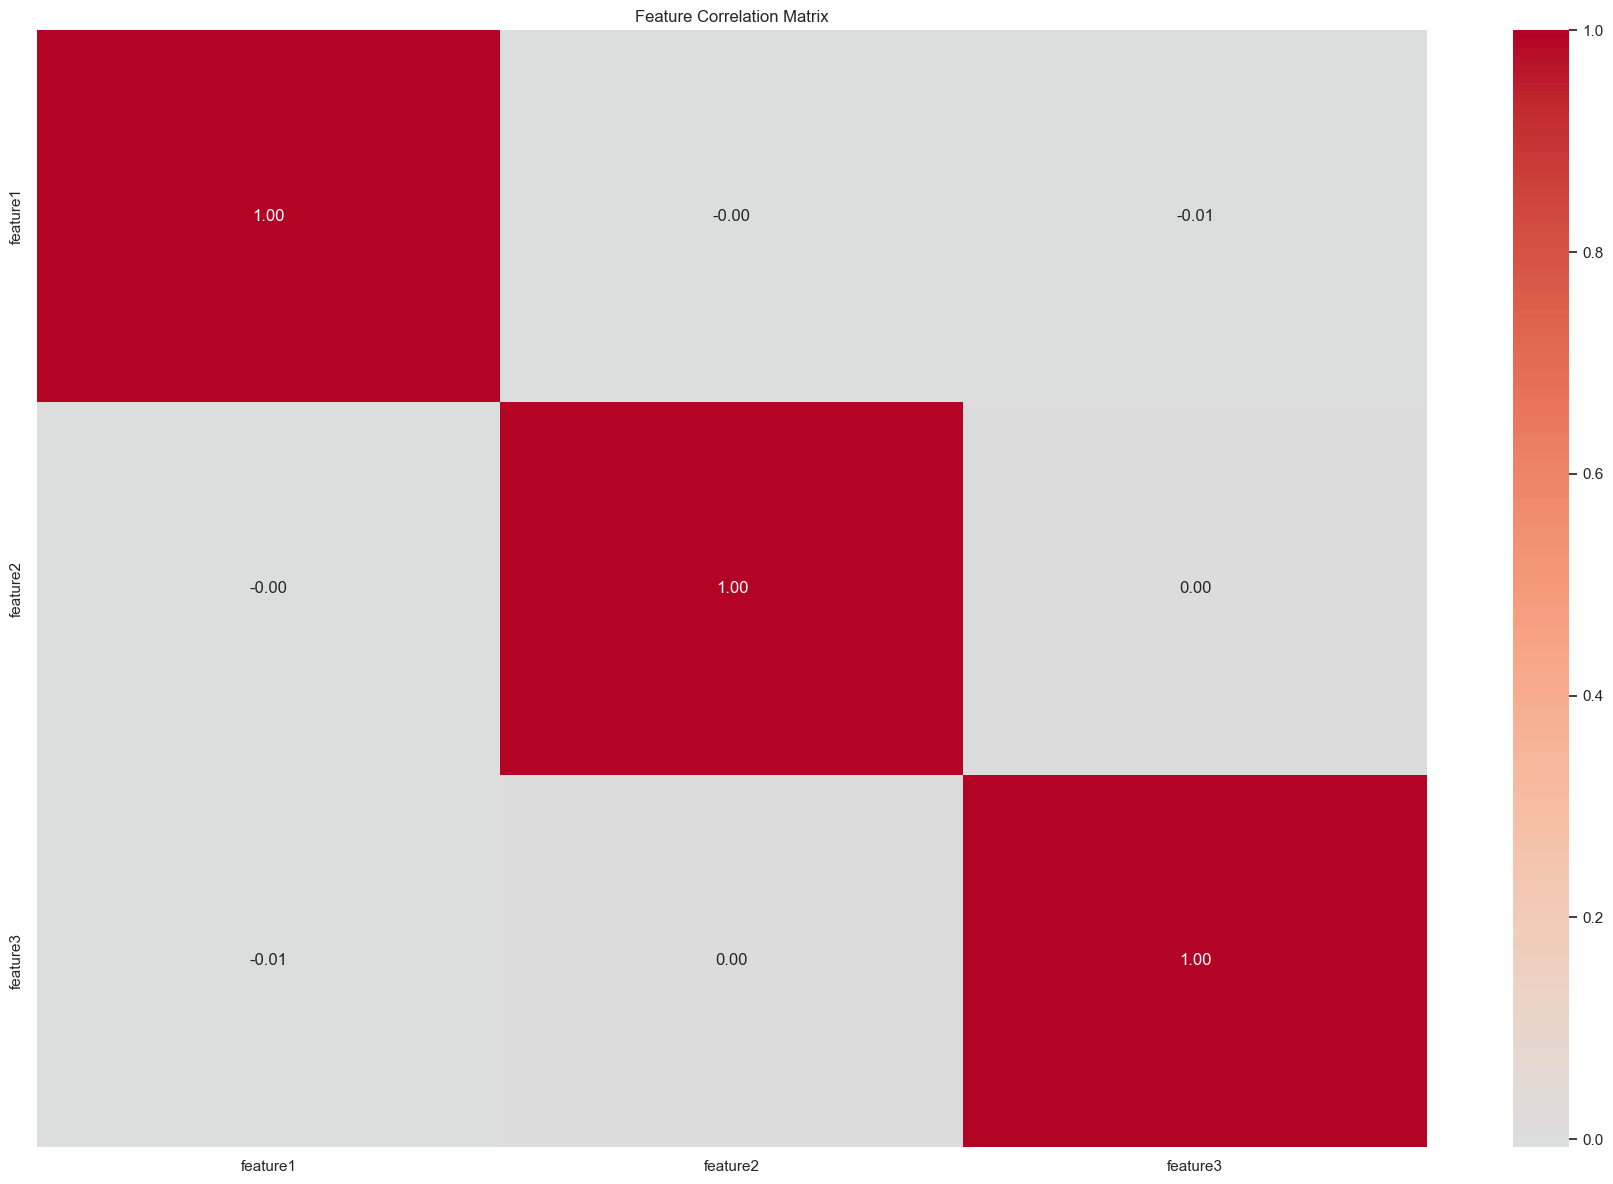

AttributeError: module 'pandas' has no attribute 'np'

In [67]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

# Step 1: Drop target and ID columns
X = df_encoded.drop(columns=['transaction_id', 'fraud'])
y = df_encoded['fraud']

# Step 2: Visualize the correlation matrix
plt.figure(figsize=(18, 12))
corr_matrix = X.corr()
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', center=0)
plt.title("Feature Correlation Matrix")
plt.tight_layout()
plt.show()

# Step 3: Remove highly correlated features
# Get upper triangle of correlation matrix
upper = corr_matrix.where(
    pd.np.triu(pd.np.ones(corr_matrix.shape), k=1).astype(bool)
)

# Identify columns to drop
to_drop = [column for column in upper.columns if any(upper[column].abs() > 0.85)]
print("Removed due to high correlation:", to_drop)

# Drop the highly correlated features
X_filtered = X.drop(columns=to_drop)

# Step 4: Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_filtered, y, test_size=0.2, stratify=y, random_state=42
)


In [44]:
from sklearn.model_selection import train_test_split

X = df_encoded.drop(columns=['transaction_id', 'fraud'])
y = df_encoded['fraud']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

In [45]:
X_train

,step,customer,age,gender,merchant,category,amount,customers.COUNT(transactions),customers.MAX(transactions.amount),customers.MAX(transactions.step),customers.MEAN(transactions.amount),customers.MEAN(transactions.step),customers.MIN(transactions.amount),customers.MIN(transactions.step),customers.MODE(transactions.age),customers.MODE(transactions.category),customers.MODE(transactions.gender),customers.MODE(transactions.merchant),customers.STD(transactions.amount),customers.STD(transactions.step),customers.SUM(transactions.amount),customers.SUM(transactions.step),merchants.COUNT(transactions),merchants.MAX(transactions.amount),merchants.MAX(transactions.step),merchants.MEAN(transactions.amount),merchants.MEAN(transactions.step),merchants.MIN(transactions.amount),merchants.MIN(transactions.step),merchants.MODE(transactions.age),merchants.MODE(transactions.category),merchants.MODE(transactions.customer),merchants.MODE(transactions.gender),merchants.STD(transactions.amount),merchants.STD(transactions.step),merchants.SUM(transactions.amount),merchants.SUM(transactions.step)
137390,164,1407,2,1,18,12,49.43,119,271.30,179.0,29.75,108.98,0.21,31.0,0.0,0.0,0.0,0.0,28.52,41.47,3540.55,12969.0,269636,115.26,179.0,26.95,107.56,0.00,0.0,0.0,0.0,0.0,0.0,17.54,47.30,7267890.28,29002763.0
218532,34,533,2,2,18,12,27.50,130,210.24,179.0,33.53,104.26,0.35,32.0,0.0,0.0,0.0,0.0,29.22,42.72,4359.13,13554.0,269636,115.26,179.0,26.95,107.56,0.00,0.0,0.0,0.0,0.0,0.0,17.54,47.30,7267890.28,29002763.0
67389,166,543,4,1,45,3,51.37,143,219.77,179.0,32.98,104.39,0.74,20.0,0.0,0.0,0.0,0.0,31.31,43.61,4715.74,14928.0,23562,154.91,179.0,37.17,106.99,0.00,0.0,0.0,0.0,0.0,0.0,25.00,47.70,875867.81,2520966.0
169316,175,3504,4,2,18,12,4.52,155,166.36,179.0,32.03,91.61,0.01,0.0,0.0,0.0,0.0,0.0,26.21,52.81,4965.42,14200.0,269636,115.26,179.0,26.95,107.56,0.00,0.0,0.0,0.0,0.0,0.0,17.54,47.30,7267890.28,29002763.0
251107,132,3091,2,1,18,12,47.66,152,92.94,179.0,27.31,92.83,0.10,0.0,0.0,0.0,0.0,0.0,19.78,51.16,4151.51,14110.0,269636,115.26,179.0,26.95,107.56,0.00,0.0,0.0,0.0,0.0,0.0,17.54,47.30,7267890.28,29002763.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
355189,111,1919,2,1,18,12,3.10,123,759.41,177.0,41.80,106.74,0.57,20.0,0.0,0.0,0.0,0.0,75.92,42.94,5141.74,13129.0,269636,115.26,179.0,26.95,107.56,0.00,0.0,0.0,0.0,0.0,0.0,17.54,47.30,7267890.28,29002763.0
313995,40,1295,1,1,31,2,8.96,124,783.09,179.0,45.84,102.42,0.53,10.0,0.0,0.0,0.0,0.0,95.70,44.13,5684.25,12700.0,2587,268.35,179.0,62.13,107.11,0.01,0.0,0.0,0.0,0.0,0.0,44.68,47.99,160738.18,277101.0
414419,97,3315,3,2,18,12,28.22,147,252.01,174.0,32.21,85.33,0.14,1.0,0.0,0.0,0.0,0.0,28.32,50.63,4735.30,12544.0,269636,115.26,179.0,26.95,107.56,0.00,0.0,0.0,0.0,0.0,0.0,17.54,47.30,7267890.28,29002763.0
234252,58,982,5,1,30,12,30.26,143,937.28,179.0,41.20,98.48,0.12,16.0,0.0,0.0,0.0,0.0,93.58,48.88,5892.19,14082.0,184938,118.07,179.0,26.95,76.56,0.00,0.0,0.0,0.0,0.0,0.0,17.53,50.70,4983444.75,14158954.0


In [ ]:
!git add .
!git commit -m "Train-Test Split"
!git push -u origin main

In [46]:
import pandas as pd
import numpy as np

# Correlation matrix
corr_matrix = X_train.corr().abs()

# Upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Drop features with correlation > 0.9
to_drop = [column for column in upper.columns if any(upper[column] > 0.9)]
X_train_filtered = X_train.drop(columns=to_drop)
X_test_filtered = X_test.drop(columns=to_drop)


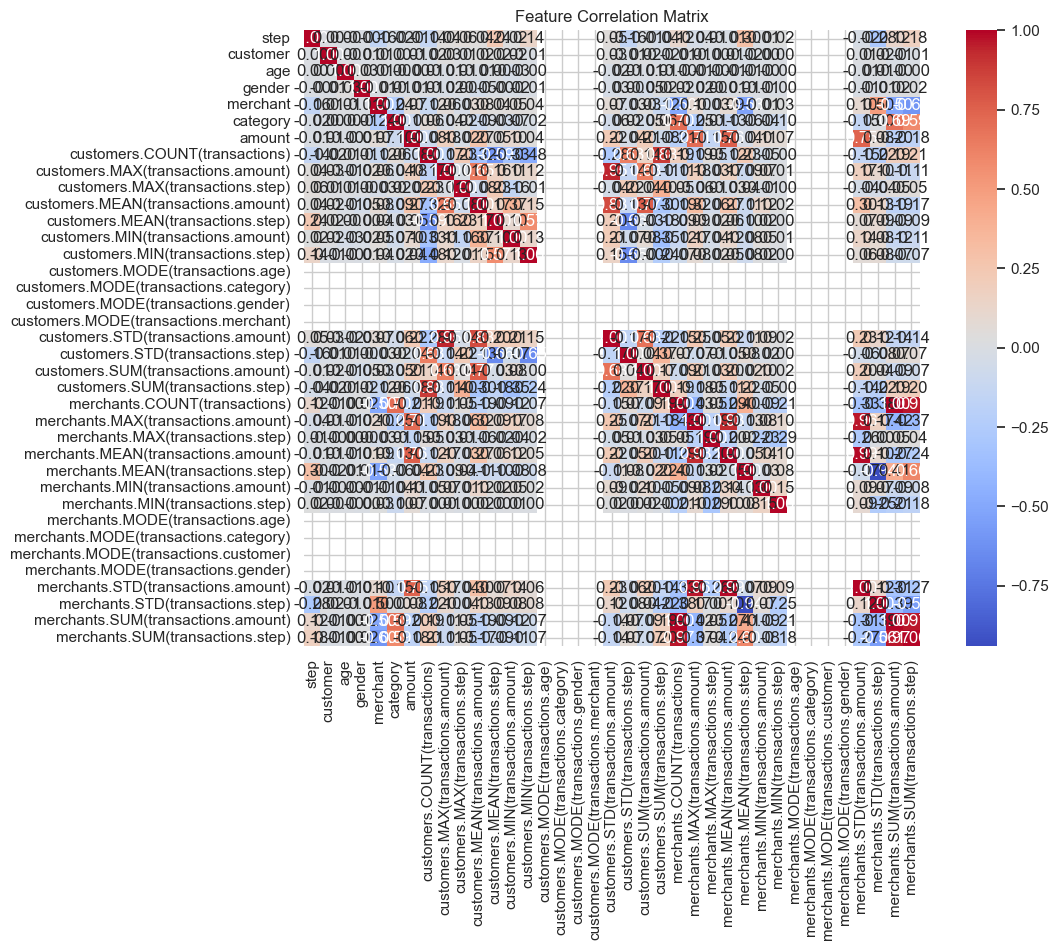

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
sns.heatmap(X_train.corr(), annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Feature Correlation Matrix")
plt.show()


In [61]:
import pandas as pd

# Assuming df is your original DataFrame
# Compute the correlation matrix
corr_matrix = df.corr()

# Select the upper triangle of the correlation matrix
upper = corr_matrix.where(
    pd.np.triu(pd.np.ones(corr_matrix.shape), k=1).astype(bool)
)

# Find columns with correlation > 0.85 or < -0.85
to_drop = [
    column for column in upper.columns 
    if any(upper[column].abs() > 0.85)
]

# Drop those columns from the DataFrame
df_filtered = df.drop(columns=to_drop)

print("Removed features:", to_drop)


Dropped due to correlation > 0.85: ['customers.STD(transactions.amount)', 'customers.SUM(transactions.step)', 'merchants.MEAN(transactions.amount)', 'merchants.STD(transactions.amount)', 'merchants.STD(transactions.step)', 'merchants.SUM(transactions.amount)', 'merchants.SUM(transactions.step)']


In [ ]:
!git add .
!git commit -m "Correlation and feature selection"
!git push -u origin main

In [65]:
print("Shape of X_train_filtered before SMOTE:", X_train_filtered.shape)
print("Shape of y_train before SMOTE:", y_train.shape)
print("Distribution of y_train before SMOTE:", Counter(y_train))
print("-" * 30)

print("Shape of X_test_filtered:", X_test_filtered.shape)
print("Shape of y_test:", y_test.shape)
print("Distribution of y_test:", Counter(y_test))
print("-" * 30)

# Apply SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_filtered, y_train)

print("\nAfter SMOTE:")
print("Shape of X_train_resampled:", X_train_resampled.shape)
print("Shape of y_train_resampled:", y_train_resampled.shape)
print("Distribution of y_train_resampled:", Counter(y_train_resampled))
print("-" * 30)


# --- NOW, THE CRITICAL FIX ---

# Scenario 1: Error during model fitting (should be fine if SMOTE was successful)
try:
    print("\nAttempting to fit a model...")
    model = LogisticRegression(random_state=42, solver='liblinear', max_iter=1000) # Increased max_iter for convergence
    model.fit(X_train_resampled, y_train_resampled)
    print("Model fitted successfully!")
except ValueError as e:
    print(f"Error during model fitting: {e}")

# Scenario 2: Error during prediction or evaluation
try:
    print("\nAttempting to make predictions and evaluate...")
    # FIX: Use X_test_filtered, not X_test
    y_pred = model.predict(X_test_filtered) # <--- THIS IS THE CHANGE!
    # y_pred should now also have 800 samples

    print("Shape of y_pred:", y_pred.shape)
    print("Shape of y_test:", y_test.shape)
    print("-" * 30)

    print("Classification Report:")
    print(classification_report(y_test, y_pred))

    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))

    print("Accuracy:")
    print(accuracy_score(y_test, y_pred))

except ValueError as e:
    print(f"Error during prediction/evaluation: {e}")


Shape of X_train_filtered before SMOTE: (3200, 3)
Shape of y_train before SMOTE: (3200,)
Distribution of y_train before SMOTE: Counter({0: 3040, 1: 160})
------------------------------
Shape of X_test_filtered: (800, 3)
Shape of y_test: (800,)
Distribution of y_test: Counter({0: 760, 1: 40})
------------------------------

After SMOTE:
Shape of X_train_resampled: (6080, 3)
Shape of y_train_resampled: (6080,)
Distribution of y_train_resampled: Counter({0: 3040, 1: 3040})
------------------------------

Attempting to fit a model...
Model fitted successfully!

Attempting to make predictions and evaluate...
Shape of y_pred: (800,)
Shape of y_test: (800,)
------------------------------
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.48      0.64       760
           1       0.05      0.50      0.09        40

    accuracy                           0.48       800
   macro avg       0.50      0.49      0.36       800
weighted avg   

Model training

ferfegtbgtrg
